# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/surajshrestha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv('NEWS_API_KEY')
type(api_key)

str

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='Bitcoin', language='en')
btc_articles

{'status': 'ok',
 'totalResults': 9442,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Kris Holt',
   'title': 'New York passes a bill to limit bitcoin mining',
   'description': "New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It's now bound for the desk of Governor Kathy Hochul, who will sign it into law or veto th…",
   'url': 'https://www.engadget.com/new-york-cryptocurrency-bill-bitcoin-mining-climate-change-161126292.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-05/a8217250-bdfa-11eb-bfc4-2663225cea83',
   'publishedAt': '2022-06-03T16:11:26Z',
   'content': "New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It's now bound for the desk of… [+2036 chars]"},
  {'source': {'id': 

In [5]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum', language='en')
eth_articles

{'status': 'ok',
 'totalResults': 4535,
 'articles': [{'source': {'id': None, 'name': 'Gizmodo.com'},
   'author': 'Kyle Barr',
   'title': 'GameStop Dunks Its Head Into the Crypto Kiddie Pool',
   'description': 'GameStop has officially thrown itself headlong into the web3 vipers nest with a new app release, though it’s hard to say whether its proposed population of gamers and game developers will take up the company on its belated, head-first jump into the crypto sph…',
   'url': 'https://gizmodo.com/gamestop-crypto-nft-wallet-blockchain-1848965386',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/cd4c128b4182d7b2fba8152d7bb35733.jpg',
   'publishedAt': '2022-05-23T21:35:00Z',
   'content': 'GameStop has officially thrown itself headlong into the web3 vipers nest with a new app release, though its hard to say whether its proposed population of gamers and game developers will take up the … [+3255 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_articles['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']


        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu

        })
    except AttributeError:
        pass

#Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)
btc_df.head()

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()


,date,text,compound,positive,negative,neutral
0,2022-06-03,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902
1,2022-06-09,"Rapper and entrepreneur Shawn Carter, better k...",0.4404,0.077,0.000,0.923
2,2022-06-08,A new study on bitcoin calls into question whe...,0.5267,0.124,0.000,0.876
3,2022-06-05,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836
4,2022-06-02,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_articles['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']


        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu

        })
    except AttributeError:
        pass

#Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)
eth_df.head()

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-23,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960
1,2022-05-23,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954
2,2022-06-07,The ability to conduct external transfers on P...,0.3182,0.059,0.000,0.941
3,2022-06-09,"A decentralized autonomous organization, or DA...",0.5859,0.134,0.000,0.866
4,2022-06-09,"Crypto Winter It May Be, But Ethereum Looks Li...",0.3612,0.081,0.044,0.875


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,-0.012115,0.054550,0.05435,0.891150
std,0.394629,0.061823,0.06989,0.094474
min,-0.859300,0.000000,0.00000,0.646000
25%,-0.317450,0.000000,0.00000,0.837500
50%,0.000000,0.041500,0.04600,0.899500
75%,0.334100,0.087750,0.08325,0.957000
max,0.526700,0.187000,0.30000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,-0.037305,0.04200,0.051150,0.906900
std,0.405662,0.04527,0.085919,0.084171
min,-0.948500,0.00000,0.000000,0.628000
25%,-0.381800,0.00000,0.000000,0.877250
50%,0.000000,0.03800,0.020000,0.925000
75%,0.328950,0.07650,0.077500,0.955750
max,0.585900,0.13400,0.372000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score with 0.048200.

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score.

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'the'}

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    sw_addon = {'the'}
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
     # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]

    return tokens

In [13]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df['text'].apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-06-03,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902,"[new, york, lawmaker, passed, bill, would, tem..."
1,2022-06-09,"Rapper and entrepreneur Shawn Carter, better k...",0.4404,0.077,0.000,0.923,"[rapper, entrepreneur, shawn, carter, better, ..."
2,2022-06-08,A new study on bitcoin calls into question whe...,0.5267,0.124,0.000,0.876,"[new, study, bitcoin, call, question, whether,..."
3,2022-06-05,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836,"[image, caption, president, faustinarchange, t..."
4,2022-06-02,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960,"[reportedly, pay, burrito, taco, bitcoin, digi..."


In [14]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-23,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960,"[gamestop, ha, officially, thrown, headlong, w..."
1,2022-05-23,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954,"[gamestop, going, allin, crypto, video, game, ..."
2,2022-06-07,The ability to conduct external transfers on P...,0.3182,0.059,0.000,0.941,"[ability, conduct, external, transfer, paypals..."
3,2022-06-09,"A decentralized autonomous organization, or DA...",0.5859,0.134,0.000,0.866,"[decentralized, autonomous, organization, dao,..."
4,2022-06-09,"Crypto Winter It May Be, But Ethereum Looks Li...",0.3612,0.081,0.044,0.875,"[crypto, winter, may, ethereum, looks, like, b..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
btc_big_string = btc_df.text.str.cat()
btc_processed = tokenizer(btc_big_string)
btc_bigrams = Counter(ngrams(btc_processed,n=2))
print(dict(btc_bigrams))

{('new', 'york'): 1, ('york', 'lawmaker'): 1, ('lawmaker', 'passed'): 1, ('passed', 'bill'): 1, ('bill', 'would'): 1, ('would', 'temporarily'): 1, ('temporarily', 'ban'): 1, ('ban', 'new'): 1, ('new', 'bitcoin'): 1, ('bitcoin', 'mining'): 2, ('mining', 'operation'): 1, ('operation', 'early'): 1, ('early', 'friday'): 1, ('friday', 'state'): 1, ('state', 'senator'): 1, ('senator', 'voted'): 1, ('voted', 'pas'): 1, ('pas', 'legislation'): 1, ('legislation', 'bound'): 1, ('bound', 'desk'): 1, ('desk', 'charsrapper'): 1, ('charsrapper', 'entrepreneur'): 1, ('entrepreneur', 'shawn'): 1, ('shawn', 'carter'): 1, ('carter', 'better'): 1, ('better', 'known'): 1, ('known', 'jayz'): 1, ('jayz', 'bringing'): 1, ('bringing', 'bitcoin'): 1, ('bitcoin', 'place'): 1, ('place', 'grew'): 1, ('grew', 'thursday'): 1, ('thursday', 'jayz'): 1, ('jayz', 'former'): 1, ('former', 'twitter'): 1, ('twitter', 'ceo'): 1, ('ceo', 'jack'): 1, ('jack', 'dorsey'): 1, ('dorsey', 'announced'): 1, ('announced', 'launch'):

In [17]:
# Generate the Ethereum N-grams where N=2
eth_big_string = eth_df.text.str.cat()
eth_processed = tokenizer(eth_big_string)
eth_bigrams = Counter(ngrams(eth_processed,n=2))

print(dict(eth_bigrams))

{('gamestop', 'ha'): 1, ('ha', 'officially'): 1, ('officially', 'thrown'): 1, ('thrown', 'headlong'): 1, ('headlong', 'web'): 1, ('web', 'viper'): 1, ('viper', 'nest'): 1, ('nest', 'new'): 1, ('new', 'app'): 1, ('app', 'release'): 1, ('release', 'though'): 1, ('though', 'hard'): 1, ('hard', 'say'): 1, ('say', 'whether'): 1, ('whether', 'proposed'): 1, ('proposed', 'population'): 1, ('population', 'gamers'): 1, ('gamers', 'game'): 1, ('game', 'developer'): 1, ('developer', 'take'): 1, ('take', 'charsgamestop'): 1, ('charsgamestop', 'going'): 1, ('going', 'allin'): 1, ('allin', 'crypto'): 1, ('crypto', 'video'): 1, ('video', 'game'): 1, ('game', 'retailer'): 1, ('retailer', 'launchedits'): 1, ('launchedits', 'selfcustodial'): 1, ('selfcustodial', 'ethereum'): 1, ('ethereum', 'digital'): 1, ('digital', 'wallet'): 1, ('wallet', 'said'): 1, ('said', 'monday'): 1, ('monday', 'wallet'): 1, ('wallet', 'accessible'): 1, ('accessible', 'google'): 1, ('google', 'chrome'): 1, ('chrome', 'extension

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
top_10_btc = token_count(btc_processed, 10)

top_10_btc_df = pd.DataFrame(list(top_10_btc), columns=['word', 'count'])
top_10_btc_df

,word,count
0,bitcoin,14
1,new,8
2,blockchain,6
3,reuters,5
4,world,5
5,cryptocurrency,5
6,token,5
7,digital,4
8,biggest,4
9,mining,3


In [20]:
# Use token_count to get the top 10 words for Ethereum
top_10_eth = token_count(eth_processed, 10)

top_10_eth_df = pd.DataFrame(list(top_10_eth), columns=['word', 'count'])
top_10_eth_df

,word,count
0,cryptocurrency,10
1,ha,6
2,crypto,4
3,ethereum,4
4,charsthe,4
5,market,4
6,year,4
7,new,3
8,video,3
9,digital,3


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

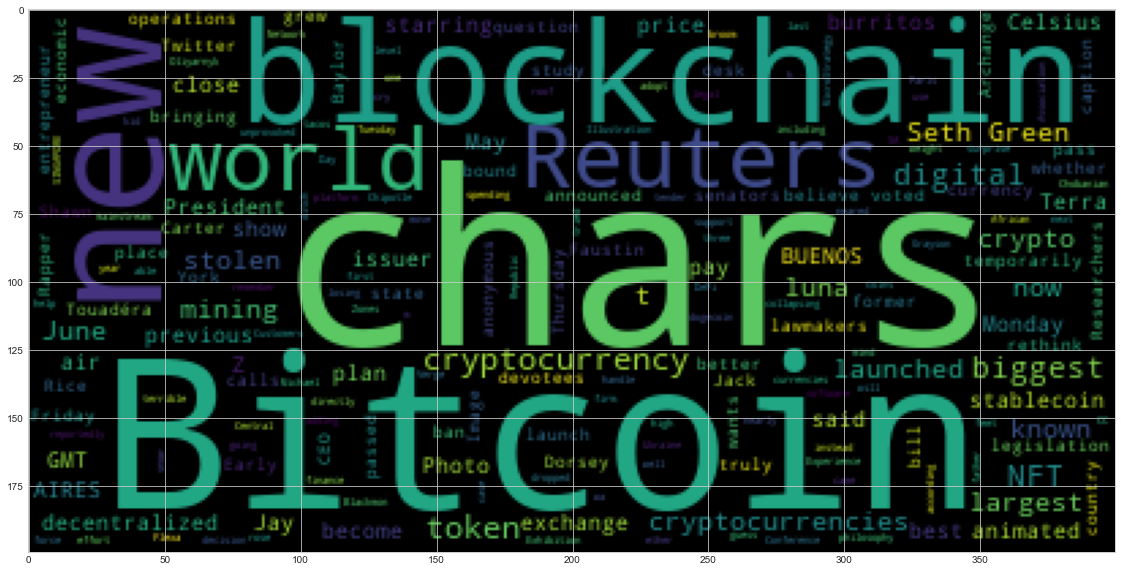

In [22]:
# Generate the Bitcoin word cloud
wc_btc = WordCloud().generate(btc_big_string)
plt.imshow(wc_btc)

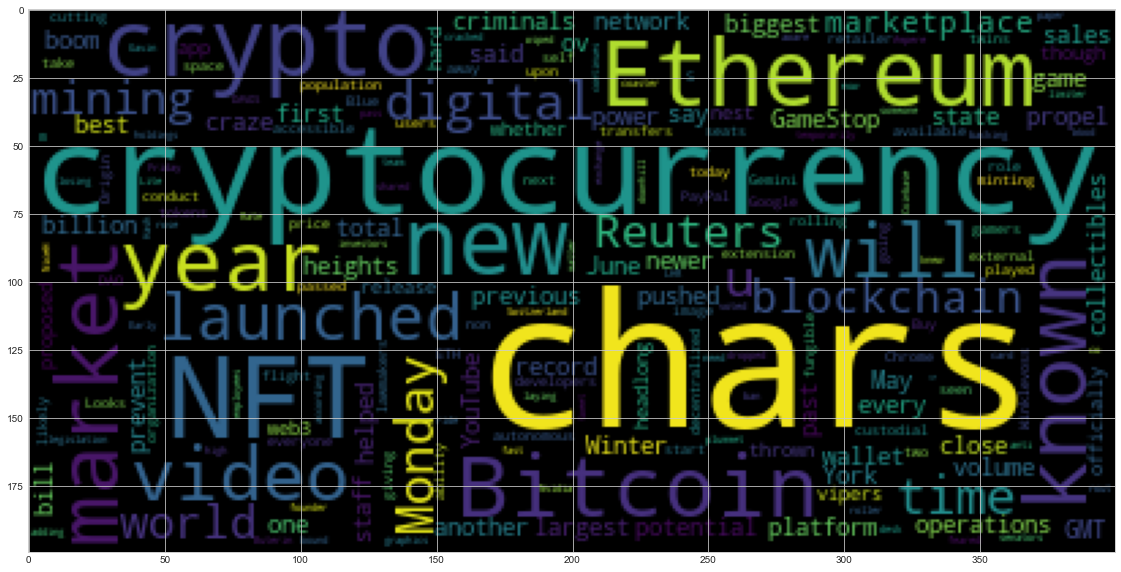

In [23]:
# Generate the Ethereum word cloud
wc_eth = WordCloud().generate(eth_big_string)
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 801 kB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
btc_text = btc_big_string

In [28]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_text)

# Add a title to the document
btc_ner.user_data['Title'] = "NER Visualization - Bitcoin"

In [29]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [30]:
# List all Entities
for ent in btc_ner.ents:
    print(ent.text, ent.label_)

New York GPE
Friday DATE
36-27 CARDINAL
Shawn Carter PERSON
Jay-Z PERSON
Thursday DATE
Jay-Z PERSON
Jack Dorsey PERSON
Faustin-Archange Touadéra LAW
The Central African Republic's ORG
Bitcoin NORP
first ORDINAL
+1428 ORG
nearly three feet QUANTITY
Chipotle ORG
The Paris NFT Day EVENT
The Celsius Network PRODUCT
DeFi GPE
Grayson Blackmon PERSON
Oliyarnyk / CC-BY-SA-4.0 ORG
Michael Chobanian PERSON
the Blockchain Association of Ukraine ORG
6 CARDINAL
Reuters ORG
5.2% PERCENT
31,441.76 MONEY
GMT WORK_OF_ART
Monday DATE
1,552.78 MONEY
34.8% PERCENT
year DATE
13 CARDINAL
Reuters ORG
12.1% PERCENT
23,366 MONEY
GMT WORK_OF_ART
Monday DATE
3,218.95 MONEY
51.6% PERCENT
June 14 DATE
Reuters ORG
Tuesday DATE
MicroStrategy Inc ORG
24 CARDINAL
Reuters ORG
its ninth week DATE
Seth Green's PERSON
NFT ORG
today DATE
Seth Green's PERSON
NFT ORG
two CARDINAL
Seth Green's PERSON
Nike ORG
Bankman-Fried PERSON
the digital asset exchange ORG
FTX ORG
Riot Blockchain PERSON
Marathon Digital Holdings ORG
May 3

---

### Ethereum NER

In [36]:
# Concatenate all of the Ethereum text together
eth_text  = eth_big_string

In [37]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_text)

# Add a title to the document
eth_ner.user_data['Title'] = 'NER Visualization - Ethereum'

In [38]:
# Render the visualization
displacy.render(eth_ner, style = 'ent')

In [39]:
# List all Entities
for ent in eth_ner.ents:
    print(ent.text, ent.label_)

GameStop ORG
web3 LOC
Ethereum ORG
Monday DATE
Google Chrome PRODUCT
PayPal ORG
today DATE
U.S. GPE
DAO ORG
two CARDINAL
Blue Origin ORG
first ORDINAL
Gemini ORG
Ethereum (Cryptocurrency ORG
chars]New York GPE
Friday DATE
36-27 CARDINAL
Switzerland GPE
May 25 DATE
Reuters ORG
Gavin Wood PERSON
Nvidia ORG
Ampere Lite Hash Rate WORK_OF_ART
LHR ORG
Ethereum ORG
18% PERCENT
about 1,100 CARDINAL
6 CARDINAL
Reuters ORG
5.2% PERCENT
31,441.76 MONEY
GMT WORK_OF_ART
Monday DATE
1,552.78 MONEY
34.8% PERCENT
year DATE
13 CARDINAL
Reuters ORG
12.1% PERCENT
23,366 MONEY
GMT WORK_OF_ART
Monday DATE
3,218.95 MONEY
51.6% PERCENT
Buterin PERSON
AI ORG
Eliezer Yudkowsky PERSON
Elon Musk PERSON
YouTube ORG
the past few years DATE
NFT ORG
$29 billion MONEY
several years ago DATE
NFT ORG
Kim Kardashian PERSON
Floyd Mayweather PERSON
NBA ORG
Paul Pierce PERSON
Ether PERSON
+2773 chars]Solana GPE
third ORDINAL
10% PERCENT
Wednesday DATE
the past few years DATE
NFT ORG
$29 billion MONEY
6 CARDINAL
New York's 

---